# ***Importing Data***

**Datatset**



This dataset is obtained from Kaggle:[ Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data)

Let's train a machine learning model to assist with diagnosing Heart Failure disease.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, Normalizer
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
RANDOM_STATE = 55

In [ ]:
df = pd.read_csv("heart.csv")

# ***Pre-processing the Data***

Let's get column names, length of dataset, check whether dataset contains null values if so then sum of null values in each row, and data type of each coulmn.

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
len(df)

918

In [ ]:
dict(df.isna().any())

{'Age': np.False_,
 'Sex': np.False_,
 'ChestPainType': np.False_,
 'RestingBP': np.False_,
 'Cholesterol': np.False_,
 'FastingBS': np.False_,
 'RestingECG': np.False_,
 'MaxHR': np.False_,
 'ExerciseAngina': np.False_,
 'Oldpeak': np.False_,
 'ST_Slope': np.False_,
 'HeartDisease': np.False_}

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
dict(df.dtypes)

{'Age': dtype('int64'),
 'Sex': dtype('O'),
 'ChestPainType': dtype('O'),
 'RestingBP': dtype('int64'),
 'Cholesterol': dtype('int64'),
 'FastingBS': dtype('int64'),
 'RestingECG': dtype('O'),
 'MaxHR': dtype('int64'),
 'ExerciseAngina': dtype('O'),
 'Oldpeak': dtype('float64'),
 'ST_Slope': dtype('O'),
 'HeartDisease': dtype('int64')}

In [ ]:
chest_pain = df['ChestPainType'].value_counts()
chest_pain

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


# ***Exploring the Data***

Using graph let's understand data

<Axes: xlabel='Sex', ylabel='Frequency'>

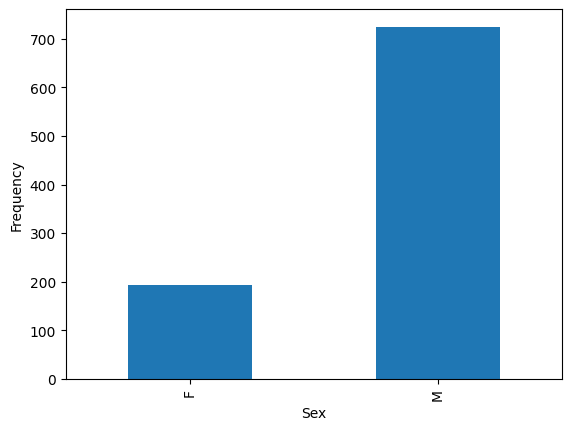

In [ ]:
Sex = df.groupby('Sex').count()['Cholesterol']
Sex.plot(xlabel='Sex', ylabel='Frequency', kind='bar')

Cholesterol level is high in male.

<Axes: >

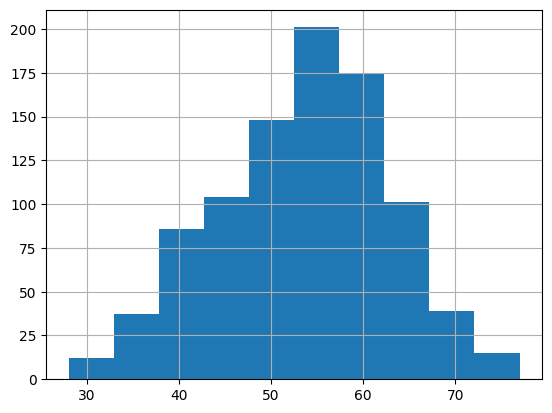

In [ ]:
df['Age'].hist()

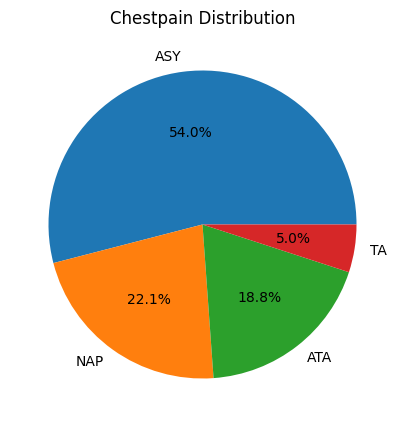

In [ ]:
chest_pain.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5))
plt.ylabel('')
plt.title('Chestpain Distribution')
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>]], dtype=object)

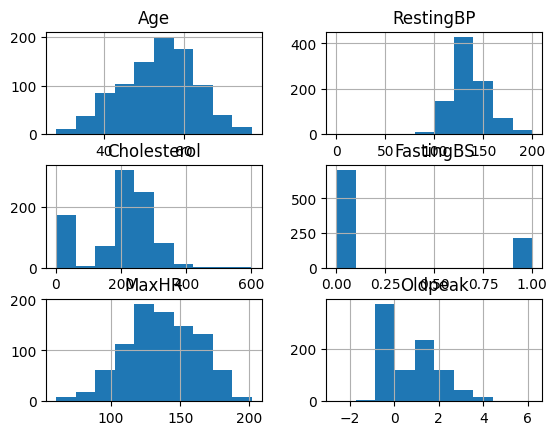

In [20]:
df.hist([ 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])

# ***Without applying feature engineering***

One-hot encoding using Pandas

In [21]:
dummy_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [22]:
df = pd.get_dummies(data = df, prefix=dummy_variables, columns = dummy_variables)


In [23]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [31]:
print(len(df.columns))

21


Retain only features

In [50]:
features = [x for x in df.columns if x not in 'HeartDisease']


# ***Training Model***

 We will split our dataset into train and test datasets

In [117]:
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8, random_state=RANDOM_STATE)

In [118]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


The hyperparameters we will use and investigate here are:

min_samples_split:
The minimum number of samples required to split an internal node.
Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.

max_depth:
The maximum depth of the tree.
Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

n_estimators: where we will choose between 10, 50, and 100. The default is 100.

In [119]:
min_samples_split_list = [20,30, 50, 60, 100, 200, 300, 700, 800]


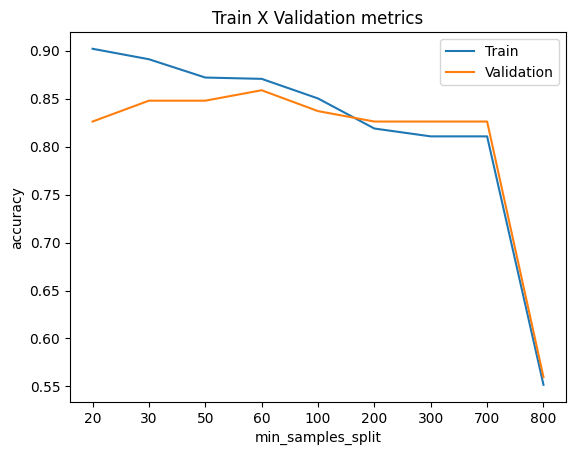

In [120]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
  model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = RANDOM_STATE).fit(X_train,y_train)
  predictions_train = model.predict(X_train)
  predictions_val = model.predict(X_val)
  accuracy_train = accuracy_score(predictions_train,y_train)
  accuracy_val = accuracy_score(predictions_val,y_val)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_val.append(accuracy_val)

plt.title('Train X Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels = min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])

In [121]:
max_depth_list = [1,2, 3,4, 5,6, 8, 10,12,14, 16,32,42, None]

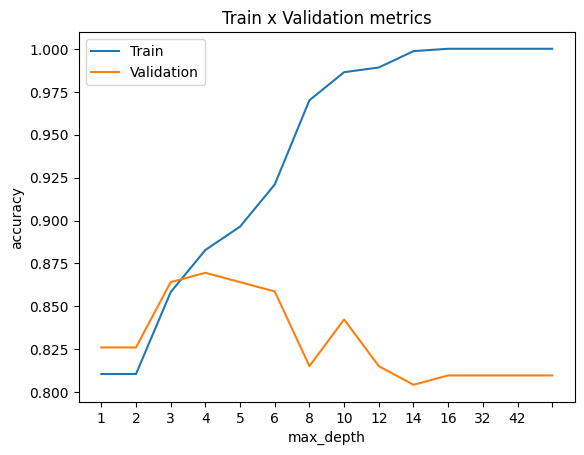

In [122]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
  model = DecisionTreeClassifier(max_depth= max_depth, random_state =  RANDOM_STATE).fit(X_train, y_train)
  predictions_train = model.predict(X_train)
  predictions_val = model.predict(X_val)
  accuracy_train = accuracy_score(predictions_train, y_train)
  accuracy_val = accuracy_score(predictions_val,y_val)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_val.append(accuracy_val)



plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

# ***Evaluating Model***


So we can choose the best values for these two hyper-parameters for our model to be:
- max_depth = 5
- min_samples_split = 50

In [123]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=50, max_depth=5, random_state=RANDOM_STATE).fit(X_train, y_train)

In [124]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8692
Metrics validation:
	Accuracy score: 0.8587


**XGBoost**

In [125]:
n_estimators_list = [10,20,50,70,100,500]

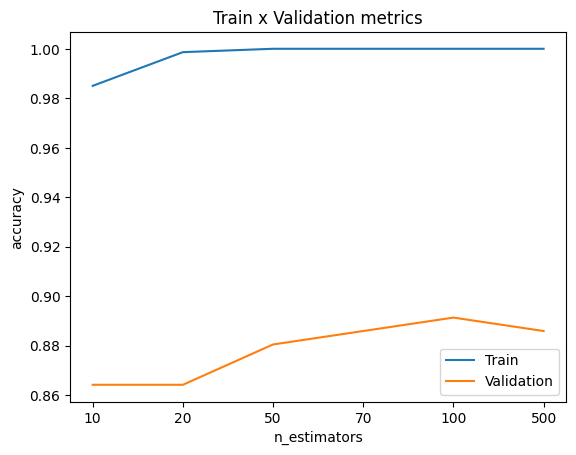

In [126]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [127]:
n = int(len(X_train)*0.8)

In [128]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [129]:
xgb_model = XGBClassifier(n_estimators =100, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.63302
[1]	validation_0-logloss:0.59554
[2]	validation_0-logloss:0.56614
[3]	validation_0-logloss:0.54187
[4]	validation_0-logloss:0.52349
[5]	validation_0-logloss:0.50611
[6]	validation_0-logloss:0.49373
[7]	validation_0-logloss:0.48366
[8]	validation_0-logloss:0.47323
[9]	validation_0-logloss:0.46538
[10]	validation_0-logloss:0.46000
[11]	validation_0-logloss:0.45621
[12]	validation_0-logloss:0.45483
[13]	validation_0-logloss:0.44975
[14]	validation_0-logloss:0.44495
[15]	validation_0-logloss:0.44073
[16]	validation_0-logloss:0.44078
[17]	validation_0-logloss:0.43936
[18]	validation_0-logloss:0.44206
[19]	validation_0-logloss:0.44536
[20]	validation_0-logloss:0.44322
[21]	validation_0-logloss:0.44310
[22]	validation_0-logloss:0.44419
[23]	validation_0-logloss:0.44797
[24]	validation_0-logloss:0.44843
[25]	validation_0-logloss:0.45337
[26]	validation_0-logloss:0.45206
[27]	validation_0-logloss:0.45435
[28]	validation_0-logloss:0.45316
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [130]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9632
Metrics test:
	Accuracy score: 0.8750


# ***With feature engineering***

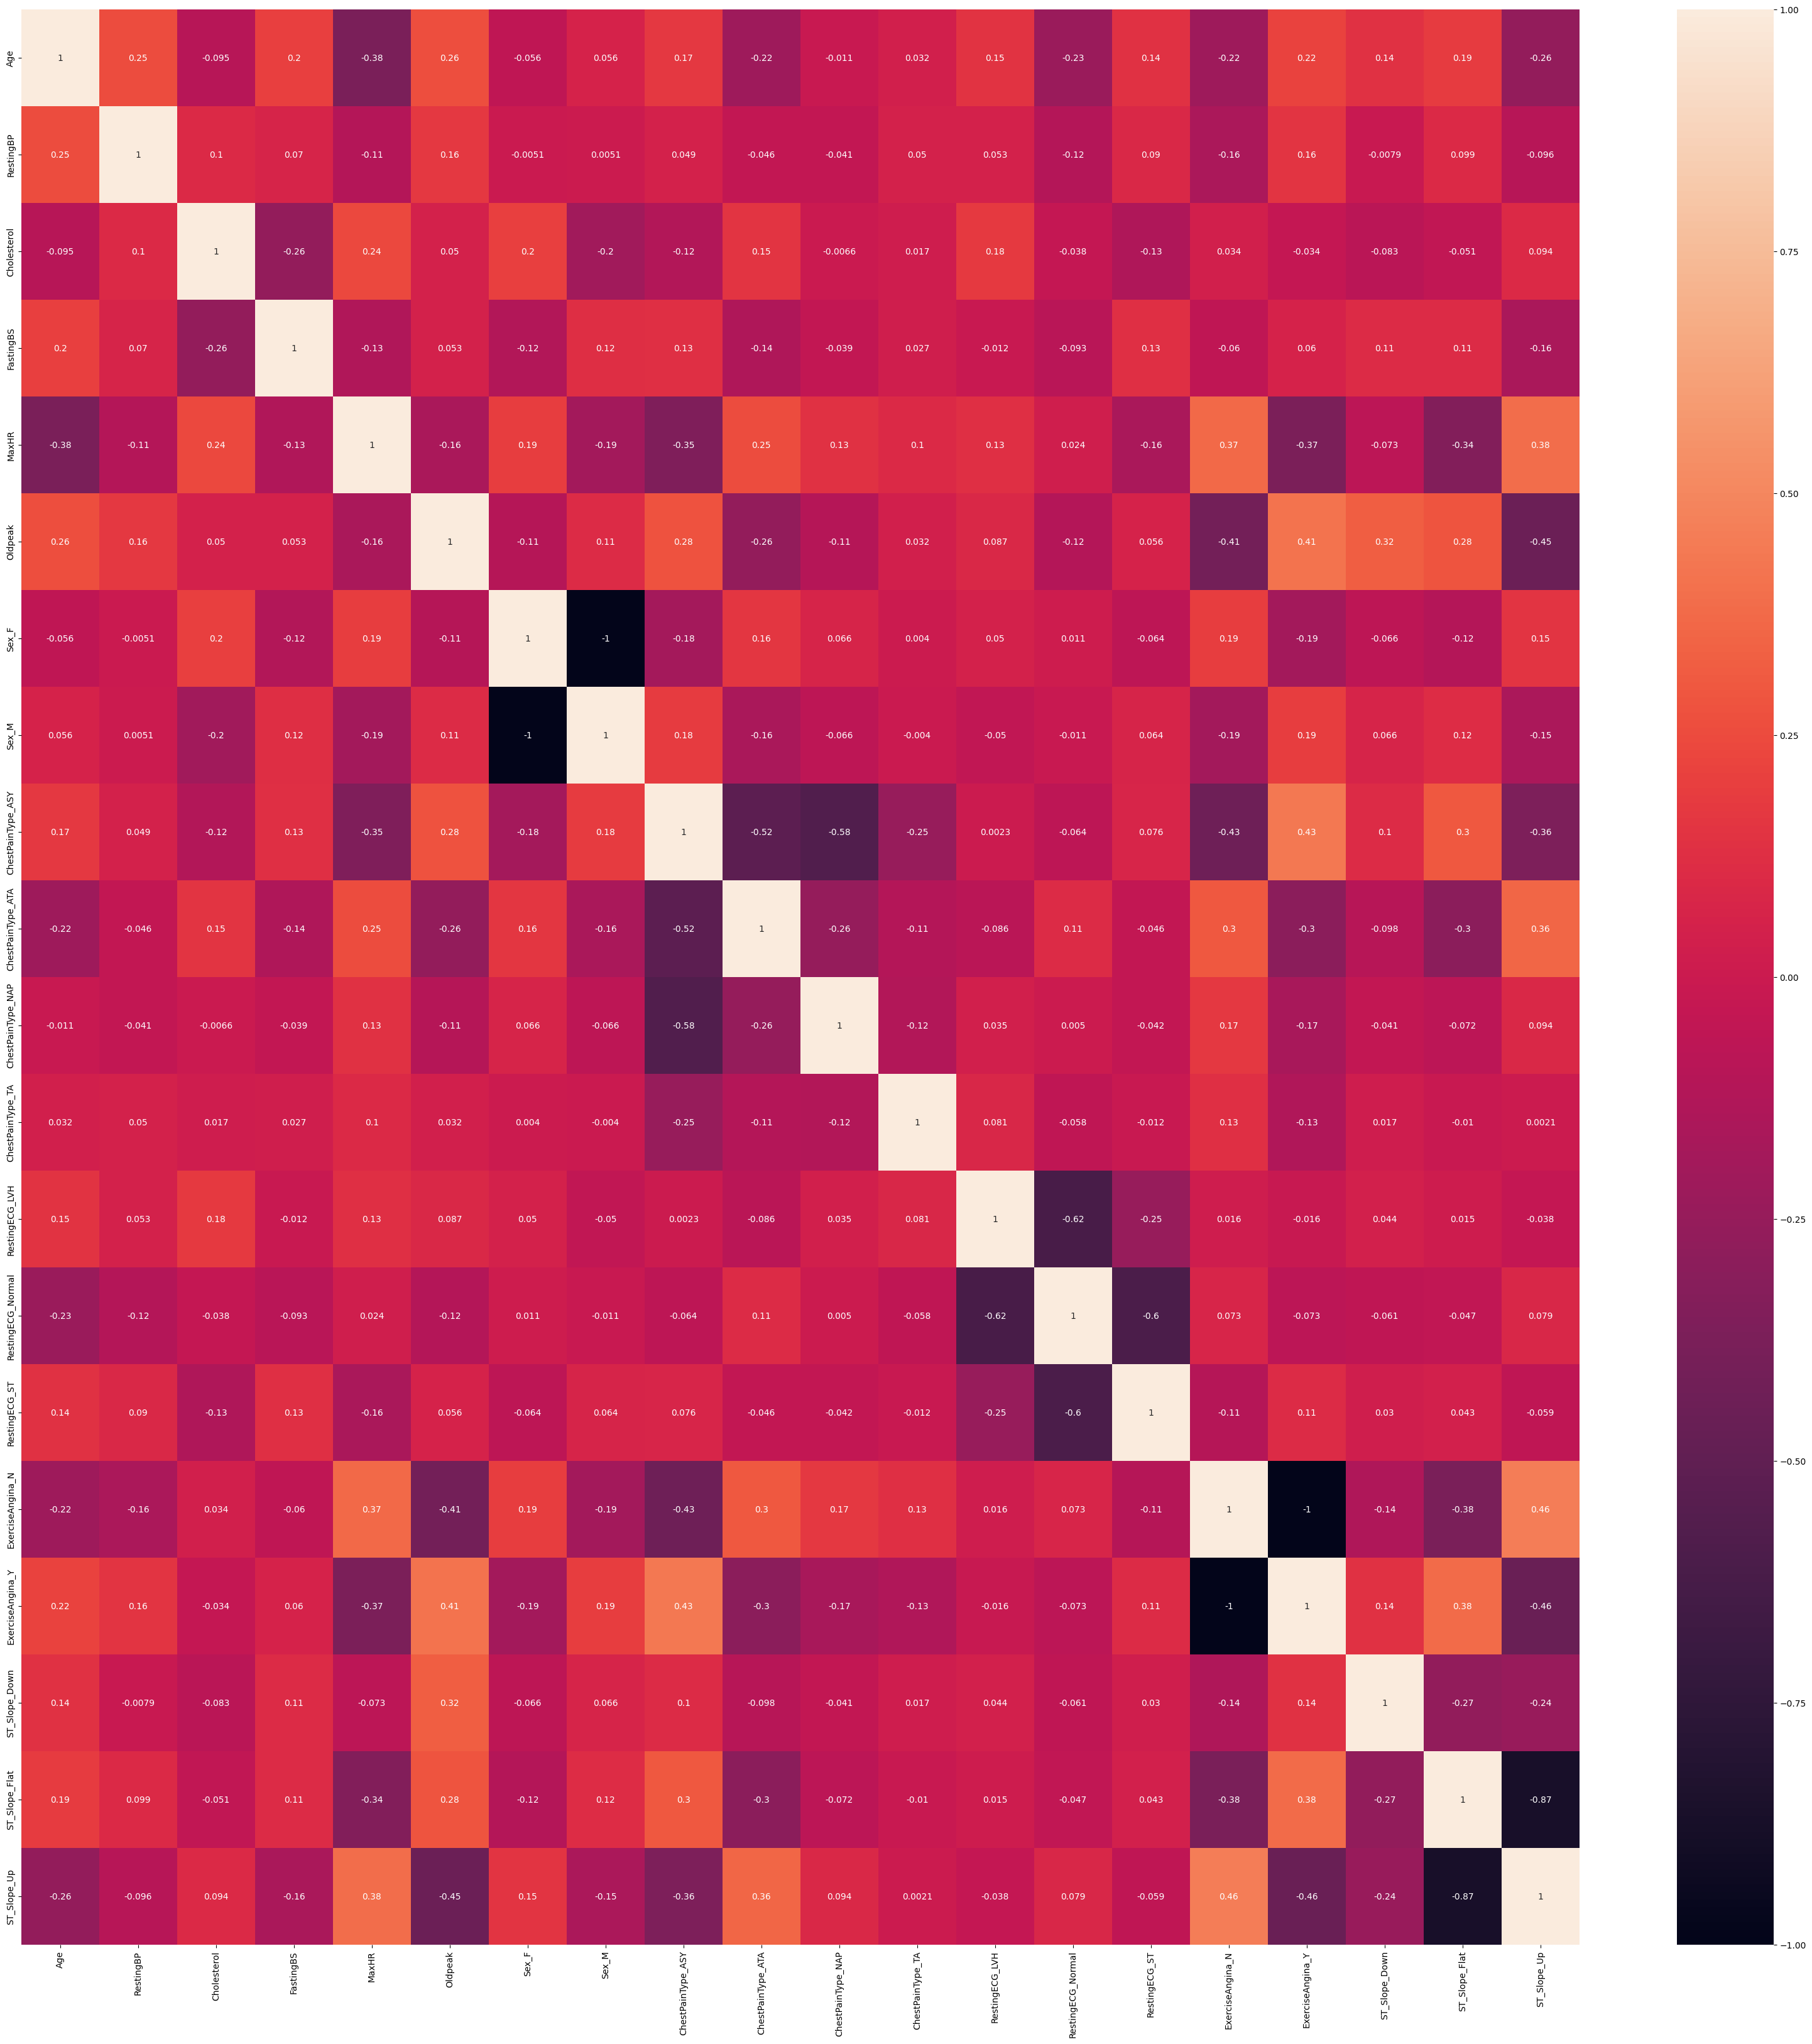

In [51]:
import seaborn as sns
#corr = df.corr(numeric_only=True)
#sns.heatmap(corr, annot=True)

# Correlation matrix
plt.figure(figsize=(40,40))
sns.heatmap(df[features].corr(), annot=True, vmax=1, vmin=-1)
correlation_matrix = df[features].corr()

In [57]:
mask = (correlation_matrix >= 0.4) & (correlation_matrix < 1)
upper_triangle = correlation_matrix.where(mask)

# Extract indices of upper triangular part
row_indices,col_indices = np.where(mask)

# Create a DataFrame with unique highly correlated pairs and their correlation coefficients
highly_correlated_pairs = pd.DataFrame({
    'Variable 1': correlation_matrix.index[row_indices],
    'Variable 2': correlation_matrix.columns[col_indices],
    'Correlation': upper_triangle.values[mask]
})

# Drop duplicates to keep only one of each pair
highly_correlated_pairs = highly_correlated_pairs.drop_duplicates(subset=['Variable 1', 'Variable 2'])

# Display the highly correlated pairs
print("Highly Correlated Variable Paris (Correlation >= 0.4):")
print(highly_correlated_pairs)

Highly Correlated Variable Paris (Correlation >= 0.4):
          Variable 1         Variable 2  Correlation
0            Oldpeak   ExerciseAngina_Y     0.408752
1  ChestPainType_ASY   ExerciseAngina_Y     0.430034
2   ExerciseAngina_N        ST_Slope_Up     0.455676
3   ExerciseAngina_Y            Oldpeak     0.408752
4   ExerciseAngina_Y  ChestPainType_ASY     0.430034
5        ST_Slope_Up   ExerciseAngina_N     0.455676


In [142]:
X = np.asarray(df[['Oldpeak',
'ST_Slope_Up',
'ExerciseAngina_Y',
'ChestPainType_ASY',
'ExerciseAngina_N'
]])
X[0:]

array([[0.0, True, False, False, True],
       [1.0, False, False, False, True],
       [0.0, True, False, False, True],
       ...,
       [1.2, False, True, True, False],
       [0.0, False, False, False, True],
       [0.0, True, False, False, True]], dtype=object)

In [143]:
y = np.asarray(df['HeartDisease'])
y [0:]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [144]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:]

array([[-0.83243239,  1.15067399, -0.8235563 , -1.08413811,  0.8235563 ],
       [ 0.10566353, -0.86905588, -0.8235563 , -1.08413811,  0.8235563 ],
       [-0.83243239,  1.15067399, -0.8235563 , -1.08413811,  0.8235563 ],
       ...,
       [ 0.29328271, -0.86905588,  1.21424608,  0.9223917 , -1.21424608],
       [-0.83243239, -0.86905588, -0.8235563 , -1.08413811,  0.8235563 ],
       [-0.83243239,  1.15067399, -0.8235563 , -1.08413811,  0.8235563 ]])

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_val.shape,  y_val.shape)

Train set: (734, 5) (734,)
Test set: (184, 5) (184,)


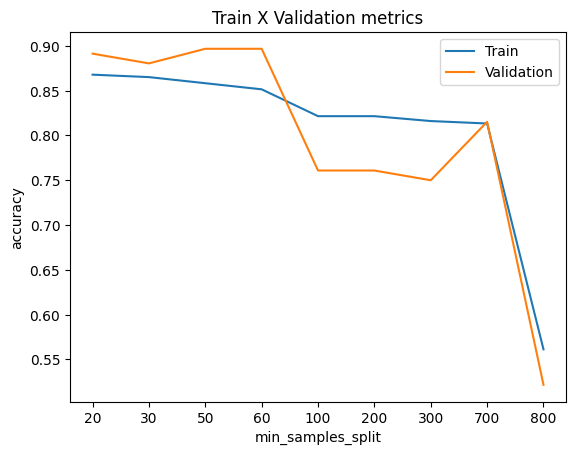

In [146]:
min_samples_split_list = [20,30, 50, 60, 100, 200, 300, 700, 800]
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
  model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = RANDOM_STATE).fit(X_train,y_train)
  predictions_train = model.predict(X_train)
  predictions_val = model.predict(X_val)
  accuracy_train = accuracy_score(predictions_train,y_train)
  accuracy_val = accuracy_score(predictions_val,y_val)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_val.append(accuracy_val)

plt.title('Train X Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels = min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])


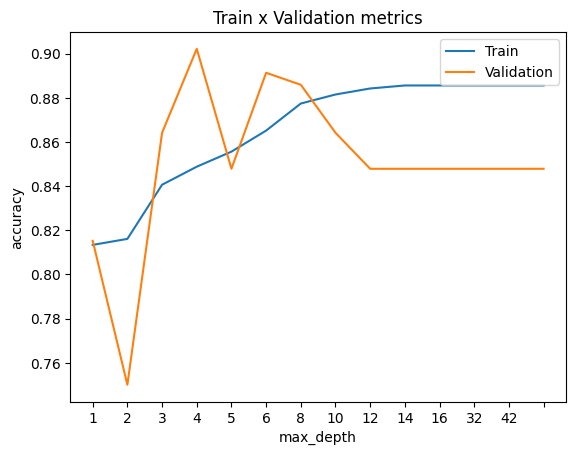

In [147]:
max_depth_list = [1,2, 3,4, 5,6, 8, 10,12,14, 16,32,42, None]
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
  model = DecisionTreeClassifier(max_depth= max_depth, random_state =  RANDOM_STATE).fit(X_train, y_train)
  predictions_train = model.predict(X_train)
  predictions_val = model.predict(X_val)
  accuracy_train = accuracy_score(predictions_train, y_train)
  accuracy_val = accuracy_score(predictions_val,y_val)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_val.append(accuracy_val)



plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])


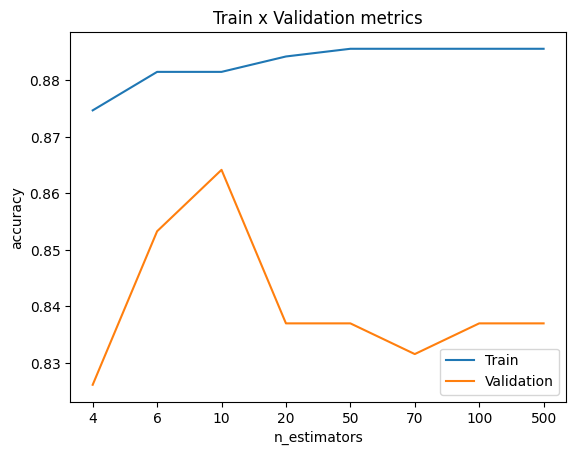

In [148]:
n_estimators_list = [4,6,10,20,50,70,100,500]
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

***Decision tree***

In [153]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=40, max_depth=10, random_state=RANDOM_STATE).fit(X_train, y_train)
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8624
Metrics validation:
	Accuracy score: 0.8913


***Random forest***

In [156]:
random_forest_model = RandomForestClassifier(n_estimators = 9,
                                             max_depth = 10,
                                             min_samples_split = 40).fit(X_train,y_train)


print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8515
Metrics test:
	Accuracy score: 0.8750


***XGBoost***

In [157]:

n = int(len(X_train)*0.8)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]
xgb_model = XGBClassifier(n_estimators =9, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

[0]	validation_0-logloss:0.63029
[1]	validation_0-logloss:0.59040
[2]	validation_0-logloss:0.55735
[3]	validation_0-logloss:0.52968
[4]	validation_0-logloss:0.50618
[5]	validation_0-logloss:0.48672
[6]	validation_0-logloss:0.46955
[7]	validation_0-logloss:0.45560
[8]	validation_0-logloss:0.44352
Metrics train:
	Accuracy score: 0.8556
Metrics test:
	Accuracy score: 0.8696


***Thank you***